### Autoencoder = encoder + decoder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=300,
                 n_features=2,
                 centers=2,
                 cluster_std=1.0,
                 random_state=101)

In [7]:
X,y = data

In [9]:
X.shape, y.shape

((300, 2), (300,))

In [12]:
np.random.seed(101)
z_noise = np.random.normal(size=len(X))
z_noise= pd.Series(z_noise)

In [13]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [14]:
features = pd.DataFrame(X)

In [16]:
features = pd.concat([features, z_noise], axis=1)

In [17]:
features.columns = ['X1', 'X2', 'X3']

In [18]:
features

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


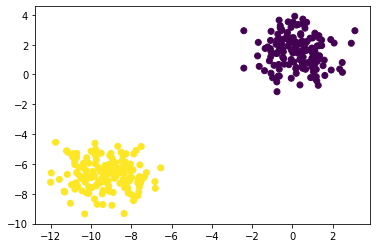

In [21]:
plt.scatter(features['X1'], features['X2'], c=y)

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [26]:
# %matplotlib notebook

<IPython.core.display.Javascript object>


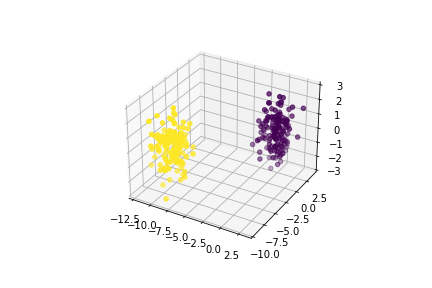

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['X1'], features['X2'], features['X3'], c=y)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [30]:
## 3 --> 2 --> 3

In [31]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [32]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [33]:
autoencoder = Sequential([encoder, decoder])

In [37]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
scaled_data = scaler.fit_transform(features)

In [41]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1858
Epoch 2/5
10/10 [==============================] - 0s 6ms/step - loss: 0.1360
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 0.1321
Epoch 4/5
10/10 [==============================] - 0s 5ms/step - loss: 0.1268
Epoch 5/5
10/10 [==============================] - 0s 5ms/step - loss: 0.1267


In [42]:
encoded_2dim = encoder.predict(scaled_data)

In [45]:
scaled_data.shape, encoded_2dim.shape

((300, 3), (300, 2))

<IPython.core.display.Javascript object>


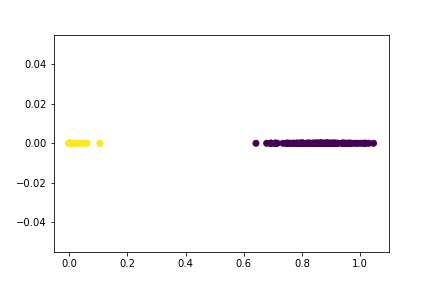

In [59]:
# %matplotlib inline
%matplotlib notebook

plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1], c=y)